visualize time space diagram (original and rectified)
- choose a lane
- plot frame # vs. x

In [1]:
from utils import *
import importlib
import utils
importlib.reload(utils)
import os.path
from os import path
import pandas as pd
import utils_optimization as opt
importlib.reload(opt)
import data_association as da
importlib.reload(da)
import time
import numpy.linalg as LA


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# read & rectify each camera df individually

data_path = pathlib.Path().absolute().joinpath('../3D tracking')
tform_path = pathlib.Path().absolute().joinpath('../tform')

In [27]:
file_path = data_path.joinpath('record_51_p1c2_00000_3D_track_outputs.csv')
df = utils.read_data(file_path)
df = utils.img_to_road(df, tform_path, 'p1c2')
df = df[df['Frame #']<30*60]
df = df[(df['bbr_y']>=3.7) & (df['bbr_y']<=7.4)]

Text(0,0.5,'bbr_x')

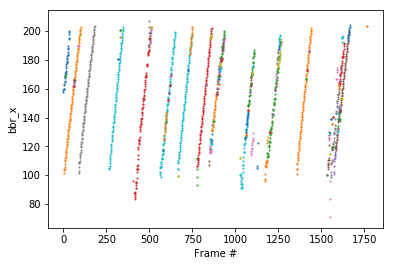

In [28]:
groups = df.groupby('ID')
for carid, group in groups:
    plt.scatter(group['Frame #'].values, group['bbr_x'].values,s=1,label=carid)
plt.xlabel('Frame #')
plt.ylabel('bbr_x')